# Model Training and Evaluation
## Guide

In [ ]:
guide = "https://www.kaggle.com/code/alibabaei78/bodyperformanceclassification"

## Make necessary imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od

## For preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder


####################
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


## Machine Learning Algorithm
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

## For Evaluation Model
from sklearn.metrics import accuracy_score

c:\Users\henri\anaconda3\envs\ML-Pipeline\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\henri\anaconda3\envs\ML-Pipeline\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\Users\henri\anaconda3\envs\ML-Pipeline\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Importing data
### Import data

In [2]:
od.download("https://www.kaggle.com/datasets/kukuroo3/body-performance-dataset")   # Got error, so I downloaded it manually

Skipping, found downloaded files in ".\body-performance-dataset" (use force=True to force download)


### Read data

In [3]:
file = 'body-performance-dataset/bodyPerformance.csv'
data = pd.read_csv(file)
data.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


### Data Analysis

In [8]:
# The number of rows and columns
rows, columns = data.shape
print('Number of rows --> ', rows)
print('Number of columns --> ', columns)

Number of rows -->  13393
Number of columns -->  12


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [10]:
data.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

C:\Users\henri\AppData\Local\Temp\ipykernel_40120\1031636820.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


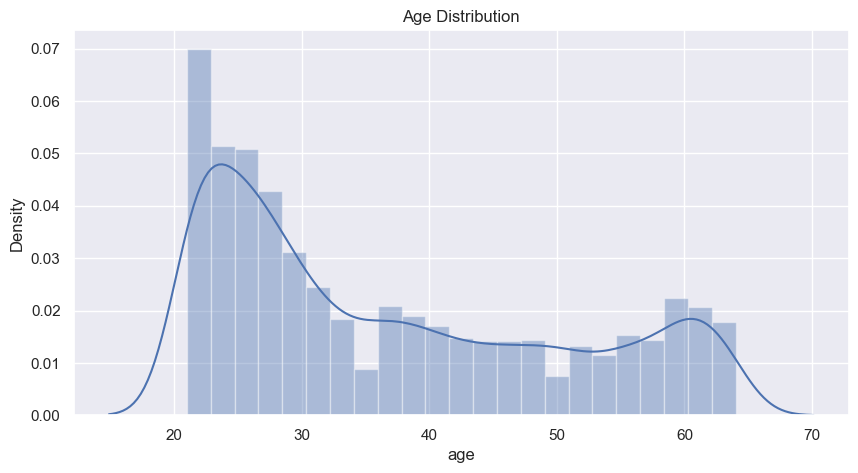

In [11]:
sns.set()
plt.figure(figsize=(10, 5))
plt.title('Age Distribution')
sns.distplot(data['age'])
plt.show()

C:\Users\henri\AppData\Local\Temp\ipykernel_40120\1314603377.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['body fat_%'])


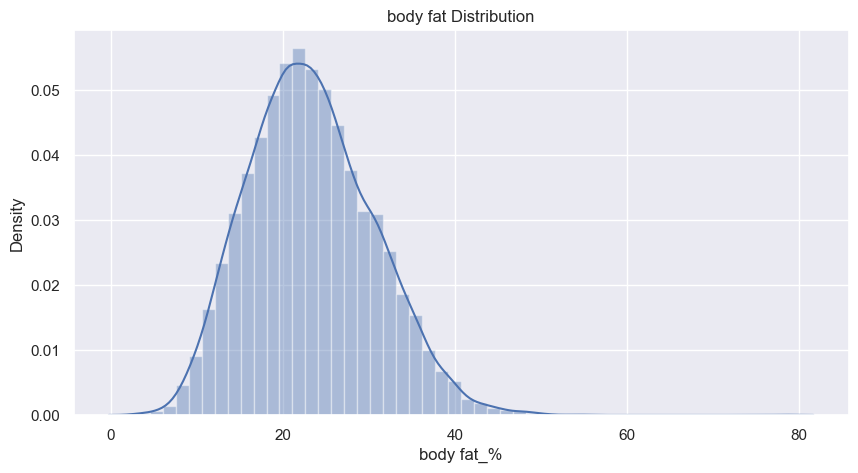

In [12]:
plt.figure(figsize=(10, 5))
plt.title('body fat Distribution')
sns.distplot(data['body fat_%'])
plt.show()

C:\Users\henri\AppData\Local\Temp\ipykernel_40120\1141585507.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['diastolic'])


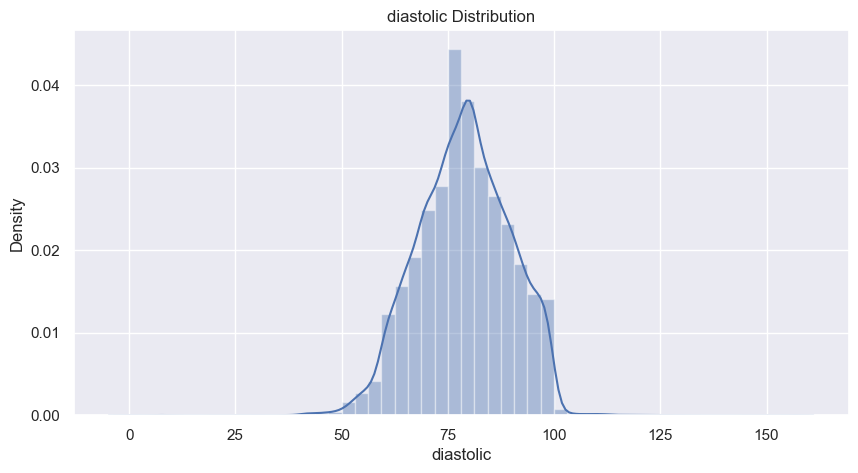

In [13]:
plt.figure(figsize=(10, 5))
plt.title('diastolic Distribution')
sns.distplot(data['diastolic'])
plt.show()

C:\Users\henri\AppData\Local\Temp\ipykernel_40120\715846468.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['systolic'])


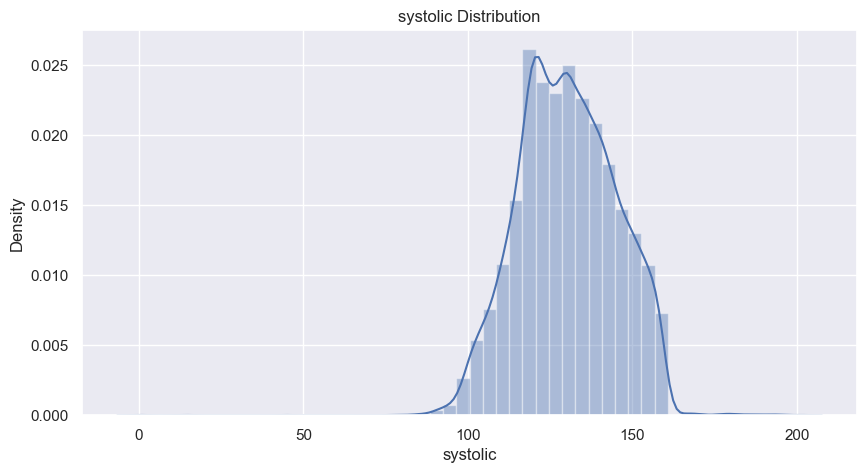

In [14]:
plt.figure(figsize=(10, 5))
plt.title('systolic Distribution')
sns.distplot(data['systolic'])
plt.show()

C:\Users\henri\AppData\Local\Temp\ipykernel_40120\1218642616.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['gripForce'])


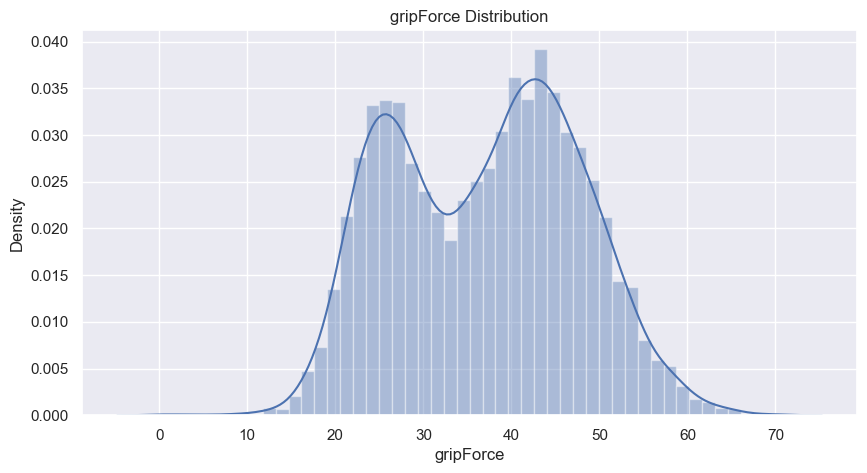

In [15]:
plt.figure(figsize=(10, 5))
plt.title('gripForce Distribution')
sns.distplot(data['gripForce'])
plt.show()

C:\Users\henri\AppData\Local\Temp\ipykernel_40120\1461131522.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['sit and bend forward_cm'])


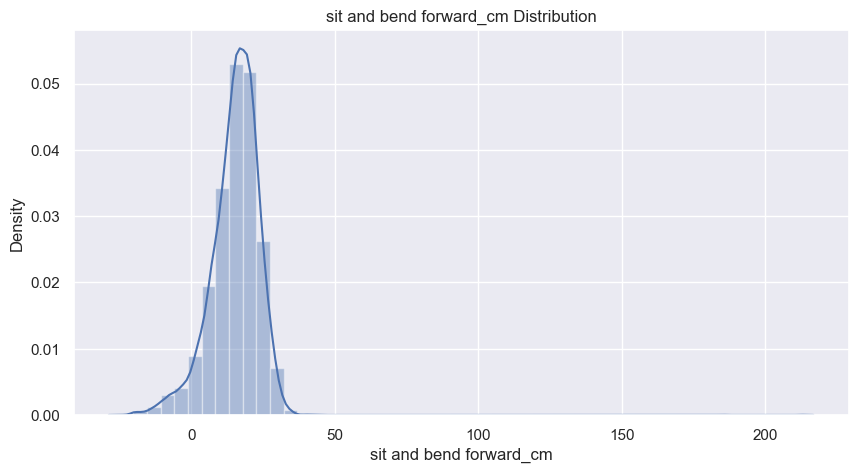

In [16]:
plt.figure(figsize=(10, 5))
plt.title('sit and bend forward_cm Distribution')
sns.distplot(data['sit and bend forward_cm'])
plt.show()

C:\Users\henri\AppData\Local\Temp\ipykernel_40120\583374526.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['sit-ups counts'])


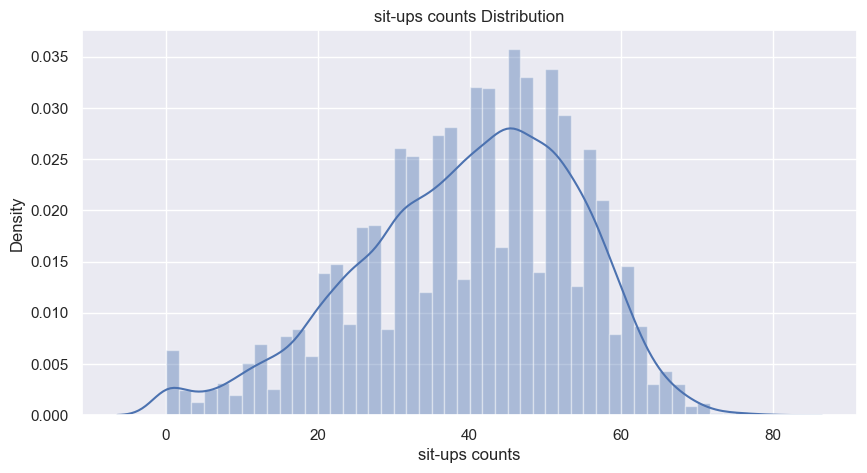

In [17]:
plt.figure(figsize=(10, 5))
plt.title('sit-ups counts Distribution')
sns.distplot(data['sit-ups counts'])
plt.show()

C:\Users\henri\AppData\Local\Temp\ipykernel_40120\3045946994.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['broad jump_cm'])


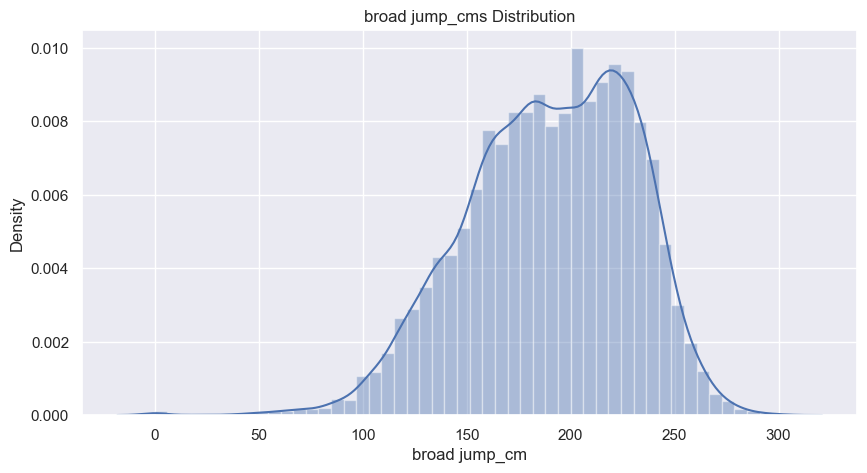

In [22]:
plt.figure(figsize=(10, 5))
plt.title('broad jump_cms Distribution')
sns.distplot(data['broad jump_cm'])
plt.show()

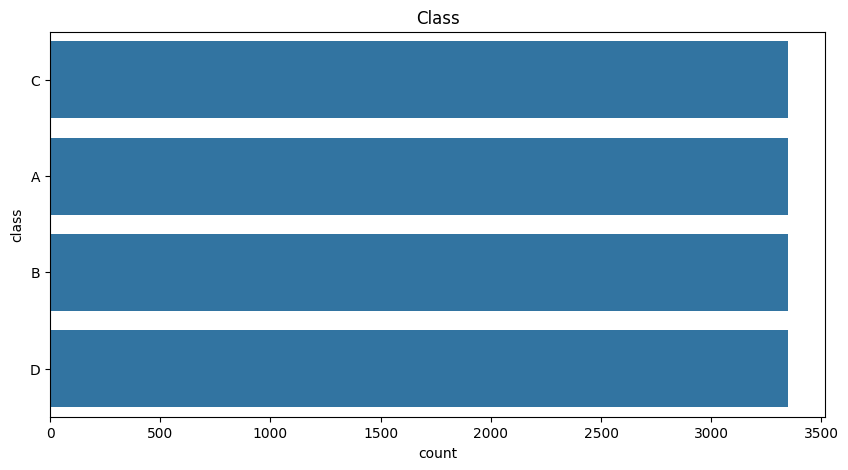

In [4]:
plt.figure(figsize=(10, 5))
plt.title('Class')
sns.countplot(data['class'])
plt.show()

### Data Preprocessing

In [5]:
sex = data[['gender']]
target = data[['class']]
data.drop(columns=['gender', 'class'], axis=1, inplace=True)

In [12]:
oneHot = OneHotEncoder(sparse_output=False)
Sex = pd.DataFrame(oneHot.fit_transform(sex), columns=oneHot.get_feature_names_out())

In [9]:
ordinal = OrdinalEncoder()
Target = pd.DataFrame(ordinal.fit_transform(target), columns=['Target'])

In [10]:
scale = StandardScaler()
Data = pd.DataFrame(scale.fit_transform(data), columns=data.columns)

In [13]:
newData = pd.concat([Sex, Data, Target], axis=1)

In [14]:
corr = newData.corr()
corr['Target'].sort_values(ascending=False)

Target                     1.000000
body fat_%                 0.341956
weight_kg                  0.214129
gender_M                   0.075605
diastolic                  0.066761
age                        0.065612
height_cm                  0.037753
systolic                   0.035484
gender_F                  -0.075605
gripForce                 -0.136088
broad jump_cm             -0.262154
sit-ups counts            -0.452832
sit and bend forward_cm   -0.588123
Name: Target, dtype: float64

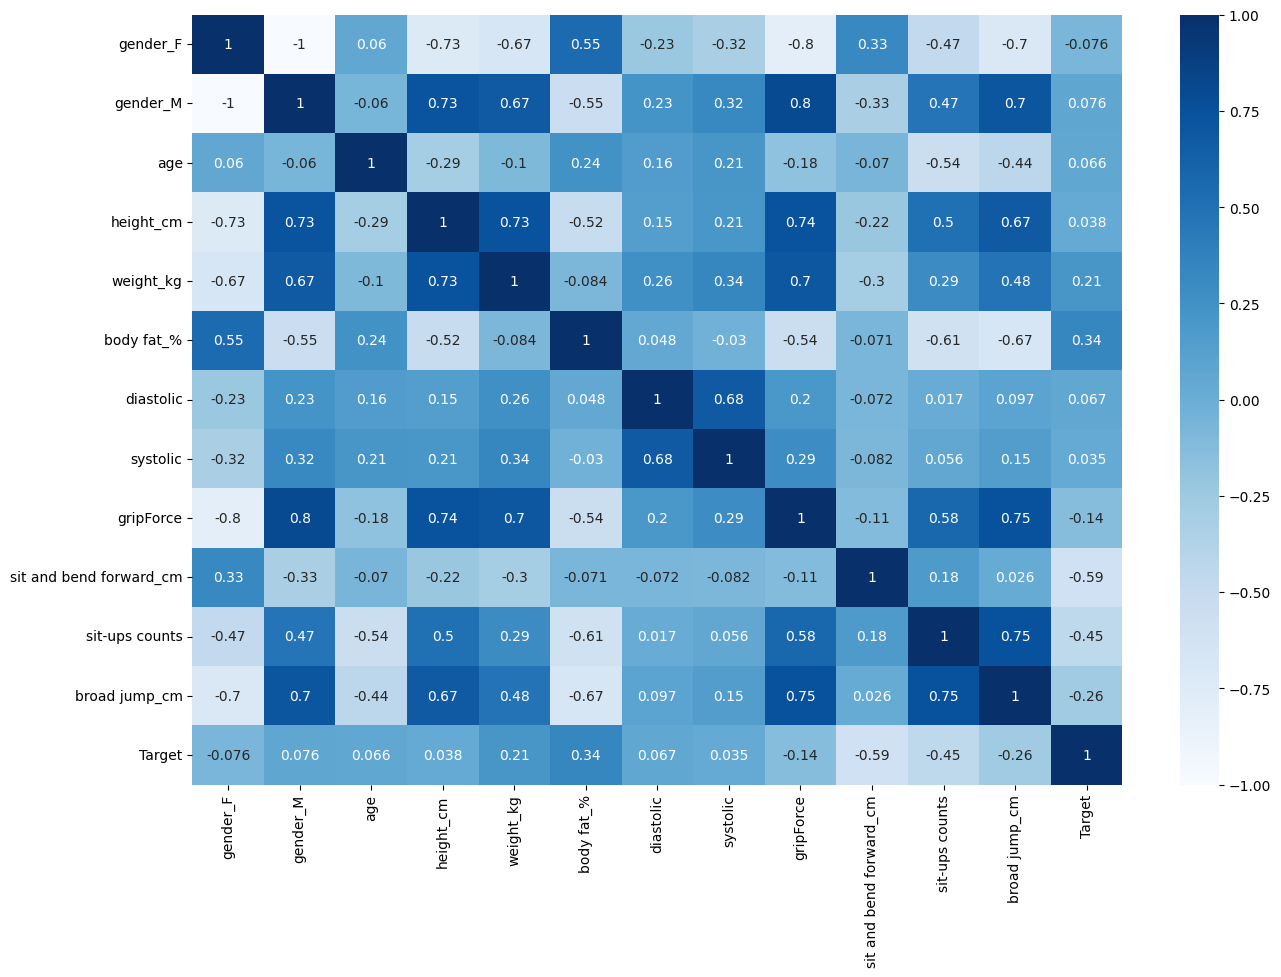

In [15]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

In [16]:
target = newData['Target']
newData.drop(columns='Target', axis=1, inplace=True)

In [18]:
newData.head(5)

,gender_F,gender_M,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,0.0,1.0,-0.717432,0.443873,0.652150,-0.267367,0.112009,-0.015959,1.688190,0.377317,1.416961,0.674009
1,0.0,1.0,-0.864220,-0.422465,-0.974734,-1.039081,-0.167278,-0.287820,-0.053073,0.128984,0.926634,0.975013
2,0.0,1.0,-0.423857,1.310211,0.883127,-0.432734,1.229158,1.479276,0.737554,-0.379509,0.646446,-0.229005
3,0.0,1.0,-0.350463,0.704961,0.305684,-0.667004,-0.260374,1.139450,0.417538,-0.001096,0.926634,0.724176
4,0.0,1.0,-0.644038,0.621888,0.021147,-0.846152,-0.818948,-0.219855,0.615195,1.406129,0.366259,0.674009


In [19]:
target.head(5)

0    2.0
1    0.0
2    2.0
3    1.0
4    1.0
Name: Target, dtype: float64

#### Train-Test Split

In [20]:
xtrain, xtest, ytrain, ytest = train_test_split(newData, target, test_size=0.3, random_state=42)

## Model Training

### BaggingClassifier

In [21]:
BaggingModel = BaggingClassifier()
BaggingModel.fit(xtrain, ytrain)

BaggingClassifier()

In [22]:
bag_cv = cross_val_score(BaggingModel, newData, target, cv=5, scoring='neg_mean_squared_error')

In [23]:
print(-bag_cv)
print(np.mean(-bag_cv))

[0.50466592 0.50877193 0.46509892 0.50261389 0.48058252]
0.4923466365371583


### XGBClassifier

In [24]:
XgbModel = XGBClassifier()
XgbModel.fit(xtrain, ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [25]:
xgb_cv = cross_val_score(XgbModel, newData, target, cv=5, scoring='neg_mean_squared_error')

In [26]:
print(-xgb_cv)
print(np.mean(-xgb_cv))

[0.42702501 0.40462859 0.40388205 0.40179238 0.41747573]
0.4109607516319918


## Model Evaluation

In [27]:
def Main(modelName, model, cv):
  print(f'============ {modelName} ============')
  print('Model training error ---> ', np.mean(-cv))
  print('َAccuracy ---> ', accuracy_score(ytest, model.predict(xtest)))
  print()

In [28]:
Main('BaggingClassifier', BaggingModel, bag_cv)
Main('XGBClassifier', XgbModel, xgb_cv)

============ BaggingClassifier ============
Model training error --->  0.4923466365371583
َAccuracy --->  0.713290194126431

============ XGBClassifier ============
Model training error --->  0.4109607516319918
َAccuracy --->  0.7578397212543554



In [29]:
votingModel = VotingClassifier(
    estimators=[('XGBClassifier', XgbModel), ('BaggingClassifier', BaggingModel)])

votingModel.fit(xtrain, ytrain)

VotingClassifier(estimators=[('XGBClassifier',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            callbacks=None, colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=0,
                                            gpu_id=-1, grow_policy='depthwise',
                                            importance_type=None,
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_bin=256, max_cat_to_onehot=4,
                                            max_delta_step=0, max_depth=6,
                                            max_leaves=0, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=100, n_jobs=0,
                                            num_parallel_tree=1,
                                            objective='multi:softprob',
                                            predictor='auto', random_state=0,
                                            reg_alpha=0, ...)),
                             ('BaggingClassifier', BaggingClassifier())])

In [30]:
for model in (XgbModel, BaggingModel, votingModel):
  model.fit(xtrain, ytrain)
  ypred = model.predict(xtest)
  print(f'{model.__class__.__name__} --> {accuracy_score(ytest, ypred)}')

XGBClassifier --> 0.7578397212543554
BaggingClassifier --> 0.7220009955201593
VotingClassifier --> 0.7513688402190144
